<a href="https://colab.research.google.com/github/DFNTAOY/Detecting-Stress-using-NLP/blob/main/Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DETECTING STRESS LEVERAGING THE POWER OF NATURAL LANGUAGE PROCESSING (NLP).

### Important Libraries import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
import re


from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

nltk.download('stopwords')
stopword =  set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Getting the Dataset to use in this Project

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")

### Getting to know more about the Dataset

In [4]:
df.head(), df.dtypes, df.dtypes.value_counts(), df.isnull().sum(), df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


(          subreddit post_id  ... syntax_fk_grade sentiment
 0              ptsd  8601tu  ...        3.253573 -0.002742
 1        assistance  8lbrx9  ...        8.828316  0.292857
 2              ptsd  9ch1zh  ...        7.841667  0.011894
 3     relationships  7rorpp  ...        4.104027  0.141671
 4  survivorsofabuse  9p2gbc  ...        7.910952 -0.204167
 
 [5 rows x 116 columns], subreddit                    object
 post_id                      object
 sentence_range               object
 text                         object
 id                            int64
                              ...   
 lex_dal_avg_pleasantness    float64
 social_upvote_ratio         float64
 social_num_comments           int64
 syntax_fk_grade             float64
 sentiment                   float64
 Length: 116, dtype: object, float64    106
 int64        6
 object       4
 dtype: int64, subreddit                   0
 post_id                     0
 sentence_range              0
 text                   

### Extracting the features of the Dataset to use in this Project

Since the dataset contains 116 features to work with, it is essential to streamdown on the most important feature(s) for the relevance of this project and hence the Feature Extraction.

In [5]:
data = df[['text', 'label']]; data.tail()

,text,label
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0
2837,I was talking to my mom this morning and she s...,1


### Checking to see there is no NULL value in the Extracted Columns

In [6]:
data.isnull().sum()

text     0
label    0
dtype: int64

### Data Cleaning

This is one of the most important step towards training Textual Dataset for a Natural Language Processing (NLP) model. This script:

* Tokenization
** Breaks the textual document into Sentences and Sentences into Words
* Stopwords
** Removes Stopwords from the Wordings
* Punctuation
** Removes unnecessary Punctuation from the Wordings
* Spacing
** Removes extra-spacing
* Stemming
** Returns the Wordings to its origin through Stemming
e.t.c


In [7]:
# Clean Text Data
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)

  return text

### Applying the Script on the Textual Feature of the Dataset

In [8]:
data['text'] = data['text'].apply(clean)
data['text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       said felt way sugget go rest trigger ahead you...
1       hey rassist sure right place post goe  im curr...
2       mom hit newspap shock would know dont like pla...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
2833     week ago precious ignor  jan  happi year prec...
2834    dont abil cope anymor im tri lot thing trigger...
2835    case first time your read post look peopl will...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine did...
Name: text, Length: 2838, dtype: object

### Inspecting most used words using Word Cloud


In [9]:
text = " ".join(i for i in data.text)
text

"said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour hey rassist sure right place post goe  im current student intern sandia nation lab work survey help improv market outreach effort mani school recruit around countri look current undergradgrad stem student your stem student know stem student would great appreci help take pass along short survey thank everyon help take survey enter draw chanc win one three  amazon gcs mom hit newspap shock would know dont like play hit smack strike hit violenc sort person send vibe ask univers yesterday decid take friend go help anoth friend move new place drive friend move strike shoulder address immedi  time told thing friend drive near get collis anoth car think high marijuana friend move backseat li

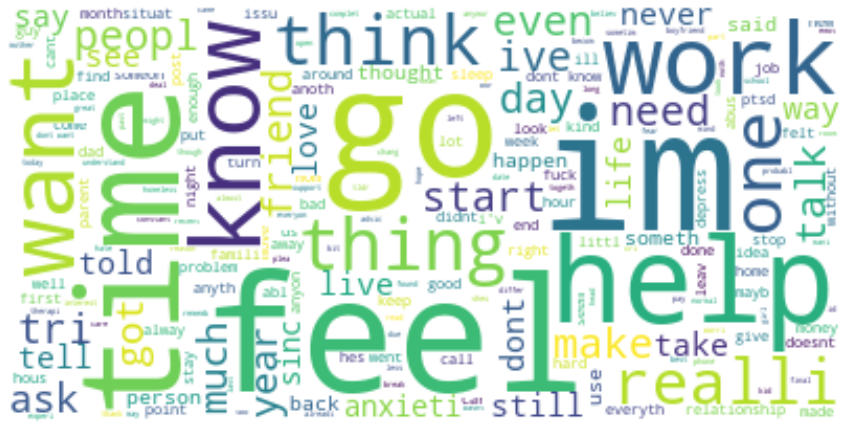

In [11]:
# Setting more Stopwords
stopwrd = set(STOPWORDS)

wordcloud = WordCloud(
    stopwords = stopwrd,
    background_color='white'
).generate(text)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Splitting the Dataset into Training and Test sets

It is essential to set split and set aside slice of dataset for training and testing the Model, in order to avoid overfitting of the model, as this could arise if the same set of Data that is used for training is as well used in testing the model.

We import the train_test_Split function to do the magic, we could as well as used Cross-Validation for much better performance, but we stick with this for this project. It could be implore for future model performance enhancement.

In [15]:
x = np.array(data['text'])
y = np.array(data['label'])

cv = CountVectorizer()
X = cv.fit_transform(x)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

Xtrain.size, Xtest.size, ytrain.size, ytest.size

(65871, 32961, 1901, 937)

### Model import and training

In [16]:
model = BernoulliNB()
model.fit(Xtrain, ytrain)

BernoulliNB()

### Predicting with the Model

We first used our Test set to make some prediction before allowing users to input their comment to be predicted upon.

In [37]:
pred = model.predict(Xtest)
dd = pd.DataFrame(pred, columns=["Predictions"])

list(dd["Predictions"].map({0: "No Stress", 1: "Stress"}))[0:14]

['No Stress',
 'No Stress',
 'Stress',
 'Stress',
 'No Stress',
 'No Stress',
 'Stress',
 'No Stress',
 'No Stress',
 'No Stress',
 'Stress',
 'Stress',
 'No Stress',
 'No Stress']

### Accepting User's input in testing the Model Prediction Accuracy

This model is far from perfect and we believe with more data, it could be improved. Some predictions were on-point while some are off the block.

Future improvement is surely possible.

In [41]:
sentence = input("Enter your comment: ")
user_data = cv.transform([sentence]).toarray()
model_output = model.predict(user_data)
print("No Stress" if model_output == 0 else "Stress")

Enter your comment: Users should be implore to manage their stress
No Stress


In [42]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [43]:
!git init

Initialized empty Git repository in /content/.git/


In [44]:
!pwd

/content


In [45]:
!git remote -v

In [46]:
!ls

sample_data


In [52]:
%cd ..

/content


In [53]:
!pwd

/content


In [54]:
! git clone https://github.com/DFNTAOY/Detecting-Stress-using-NLP

Cloning into 'Detecting-Stress-using-NLP'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [56]:
%cd Detecting-Stress-using-NLP/

/content/Detecting-Stress-using-NLP


In [57]:
!pwd

/content/Detecting-Stress-using-NLP


In [58]:
!git remote -v

origin	https://github.com/DFNTAOY/Detecting-Stress-using-NLP (fetch)
origin	https://github.com/DFNTAOY/Detecting-Stress-using-NLP (push)


In [59]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
